In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [63]:
#Here's the data and Dataframe
df = pd.read_csv("https://raw.githubusercontent.com/JohnMHoyt24/mental-health-analysis/main/master.csv")
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [114]:
new_df = df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age", "suicides_no":"# of Suicides", 
                   "population":"Population", "HDI for year":"Annual HDI", "gdp_for_year ($)":"GDP for Year ($)", "gdp_per_capita ($)":"GDP per Capita ($)",
                   "generation":"Generation"})

new_df.head()
#Renamed the columns of the Dataframe

,Country,Year,Sex,Age,# of Suicides,Population,suicides/100k pop,country-year,Annual HDI,gdp_for_year ($),GDP per Capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [65]:
new_df.drop(columns=['suicides/100k pop', 'country-year', 'Annual HDI'])



,Country,Year,Sex,Age,# of Suicides,Population,gdp_for_year ($),GDP per Capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,"63,067,077,179",2309,Generation Z


Text(0, 0.5, '# of Suicides')

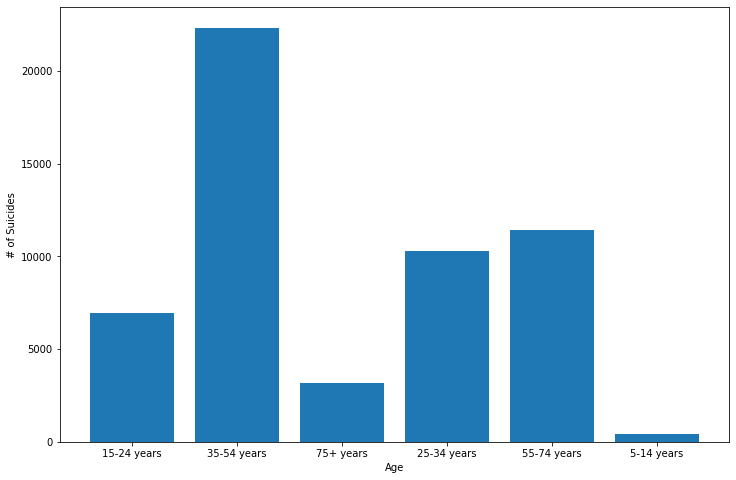

In [66]:
from google.colab import files
plt.figure(figsize= (12,8))
plt.bar(new_df['Age'], new_df['# of Suicides'])
plt.xlabel('Age')
plt.ylabel('# of Suicides')
#plt.savefig('bar-chart.jpg')
#files.download('bar-chart.jpg')
#According to this bar chart, those at 35-54 years of age experienced the highest number of suicides

In [121]:
X = new_df[['Population']]
Y = new_df[['# of Suicides']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [122]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)


In [123]:
print('Training score', linear_model.score(x_train, y_train))


Training score 0.37176127353842625


In [124]:
y_pred = linear_model.predict(x_test)


In [125]:
from sklearn.metrics import r2_score
print('Testing score', r2_score(y_test, y_pred))


Testing score 0.4249547385439153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

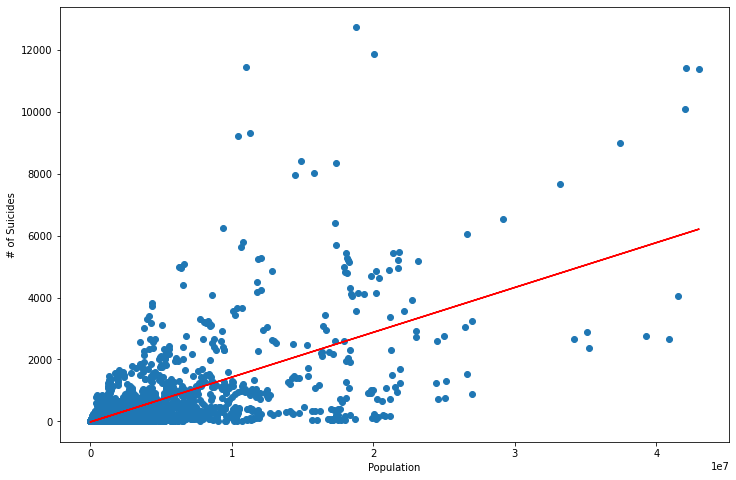

In [130]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Population')
plt.ylabel('# of Suicides')
#plt.savefig('lin-reg.jpg')
#files.download('lin-reg.jpg')


In [127]:
import seaborn as sns

new_df_corr = new_df.corr()

new_df_corr


,Year,# of Suicides,Population,suicides/100k pop,Annual HDI,GDP per Capita ($)
Year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
# of Suicides,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
Population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
Annual HDI,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
GDP per Capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

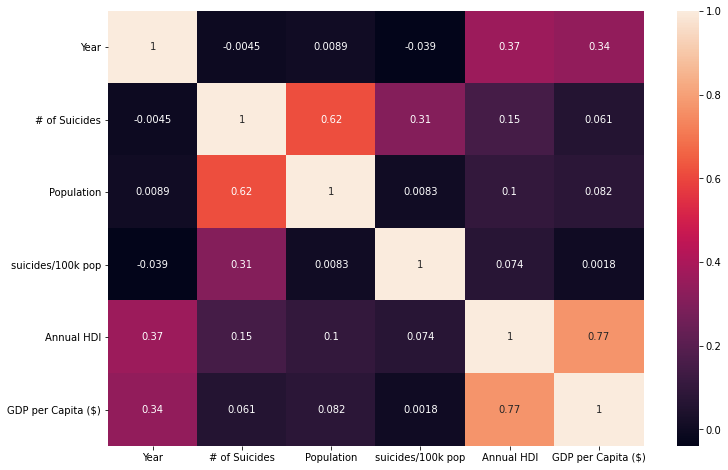

In [131]:
fig, ax = plt.subplots(figsize= (12,8))
sns.heatmap(new_df_corr, annot=True)
#plt.savefig('heatmap.jpg')
#files.download('heatmap.jpg')